<a href="https://colab.research.google.com/github/gargh1993/Tesla-Stock-Price-Prediction-using-Facebook-Prophet/blob/main/Tesla_Stock_prediction_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet # forecating package

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'
# The primary purpose of this code snippet is to ensure that Plotly charts are seamlessly displayed within Google Colaboratory notebooks.

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("TSLA.csv")

In [ ]:
#read_csv function from pandas
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-01,163.169998,163.279999,158.830002,161.830002,161.830002,109015000
1,2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
2,2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000
3,2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500
4,2023-05-05,163.970001,170.789993,163.509995,170.059998,170.059998,107440900
...,...,...,...,...,...,...,...
247,2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000
248,2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,126427500
249,2024-04-26,168.850006,172.119995,166.369995,168.289993,168.289993,108896700
250,2024-04-29,188.419998,198.869995,184.539993,194.050003,194.050003,243869700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe() # give financial information

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,221.137659,225.368611,216.928253,221.262063,221.262063,1.179811e+08
std,37.072881,37.495942,36.437670,36.975365,36.975365,2.677161e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,6.450660e+07
25%,186.057499,189.857502,182.799995,187.507500,187.507500,1.015020e+08
50%,229.955002,235.364998,225.959999,232.120003,232.120003,1.127194e+08
75%,251.562496,257.977501,247.324993,252.699993,252.699993,1.313453e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.438697e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
# Area Graph
px.area(df, x = 'Date', y = 'Close')

In [ ]:
px.line(df, x = 'Date', y = 'Close')

In [ ]:
px.area(df, x = 'Date', y = 'Volume')
# in ths last one year tesla prices are somewhere around 200M marks but, there is a clear spike in the volume at a particular date of 29th april 2024.
# there was a masive news come on that day of chinese approval for the company's driving software.
# this boost the stock price of tesla in a good effect.
# same case, happen to be seen in the tesla stock price volume on 25th jan 2024, a clear spike in the volume and that was beacause of the tesla's
# erased valuation of 80$ in valuation.

In [ ]:
# now, let see the bar graph
px.bar(df, y = 'Volume')

In [ ]:
# for more detailed let make a box plot
px.box(df, y = 'Close')
# it is benefitial to analyse the statistical data


# Understanding Facebook Prophet

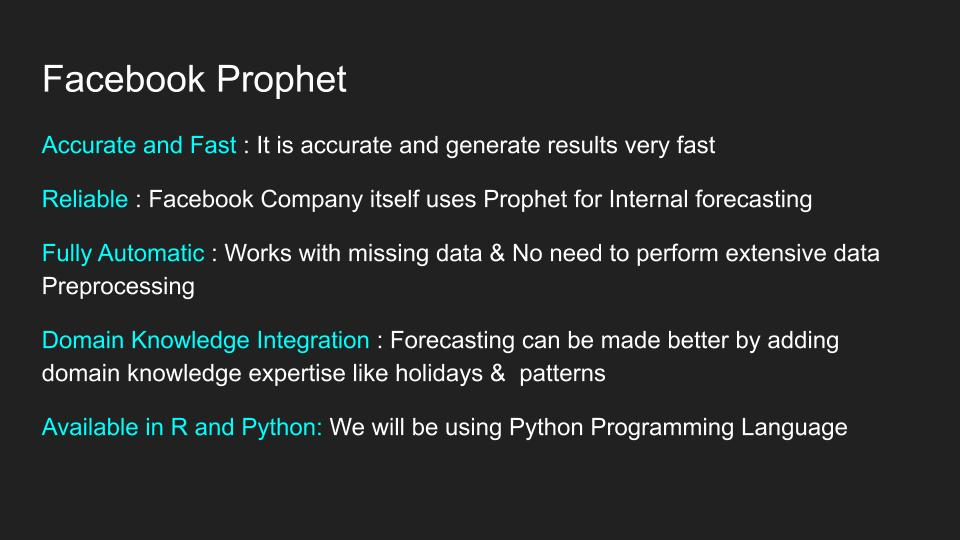

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-01,163.169998,163.279999,158.830002,161.830002,161.830002,109015000
1,2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
2,2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000
3,2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500
4,2023-05-05,163.970001,170.789993,163.509995,170.059998,170.059998,107440900
...,...,...,...,...,...,...,...
247,2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000
248,2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,126427500
249,2024-04-26,168.850006,172.119995,166.369995,168.289993,168.289993,108896700
250,2024-04-29,188.419998,198.869995,184.539993,194.050003,194.050003,243869700


In [ ]:
# creating a new dataframe for the forecasting series model
# as facebook prophet only accept two columns data and close
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns = columns)

In [ ]:
ndf

,Date,Close
0,2023-05-01,161.830002
1,2023-05-02,160.309998
2,2023-05-03,160.610001
3,2023-05-04,161.199997
4,2023-05-05,170.059998
...,...,...
247,2024-04-24,162.130005
248,2024-04-25,170.179993
249,2024-04-26,168.289993
250,2024-04-29,194.050003


In [ ]:
# as mentioned earlier facebook prophet only understand date as 'ds' and close as 'y'
# so rename the columns as follow
prophet_df = ndf.rename(columns = {'Date': 'ds', 'Close': 'y'})

In [ ]:
prophet_df

,ds,y
0,2023-05-01,161.830002
1,2023-05-02,160.309998
2,2023-05-03,160.610001
3,2023-05-04,161.199997
4,2023-05-05,170.059998
...,...,...
247,2024-04-24,162.130005
248,2024-04-25,170.179993
249,2024-04-26,168.289993
250,2024-04-29,194.050003


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4j2sxb86/7flgxhkc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4j2sxb86/1rzl131m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2863', 'data', 'file=/tmp/tmp4j2sxb86/7flgxhkc.json', 'init=/tmp/tmp4j2sxb86/1rzl131m.json', 'output', 'file=/tmp/tmp4j2sxb86/prophet_model21lvfr7s/prophet_model-20240501084249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:42:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:42:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods = 30) # creating a dataframe coontaining dates in the future
forecast = m.predict(future) # aking prediction based on the facebook prophet model used before

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-01,166.448154,145.810569,186.406986,166.448154,166.448154,0.543566,0.543566,0.543566,0.543566,0.543566,0.543566,0.0,0.0,0.0,166.991720
1,2023-05-02,167.924956,149.878628,191.535745,167.924956,167.924956,2.437284,2.437284,2.437284,2.437284,2.437284,2.437284,0.0,0.0,0.0,170.362240
2,2023-05-03,169.401758,150.307990,190.960210,169.401758,169.401758,1.736802,1.736802,1.736802,1.736802,1.736802,1.736802,0.0,0.0,0.0,171.138560
3,2023-05-04,170.878560,149.080536,190.969758,170.878560,170.878560,0.549861,0.549861,0.549861,0.549861,0.549861,0.549861,0.0,0.0,0.0,171.428421
4,2023-05-05,172.355362,152.317445,192.425236,172.355362,172.355362,0.036514,0.036514,0.036514,0.036514,0.036514,0.036514,0.0,0.0,0.0,172.391876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2024-05-26,138.082265,114.643411,156.095208,135.815237,140.606200,-2.652013,-2.652013,-2.652013,-2.652013,-2.652013,-2.652013,0.0,0.0,0.0,135.430251
278,2024-05-27,137.500622,116.585158,158.739833,135.038339,140.178310,0.543566,0.543566,0.543566,0.543566,0.543566,0.543566,0.0,0.0,0.0,138.044188
279,2024-05-28,136.918980,120.269911,159.712599,134.240586,139.725416,2.437284,2.437284,2.437284,2.437284,2.437284,2.437284,0.0,0.0,0.0,139.356264
280,2024-05-29,136.337338,118.155788,158.774921,133.484130,139.258530,1.736802,1.736802,1.736802,1.736802,1.736802,1.736802,0.0,0.0,0.0,138.074139


In [ ]:
# let see the above data as a graph
px.line(forecast, x = 'ds', y = 'yhat')
# we are getting a loop which is declining downward giving indication that price is goinf to be lower in the coming days

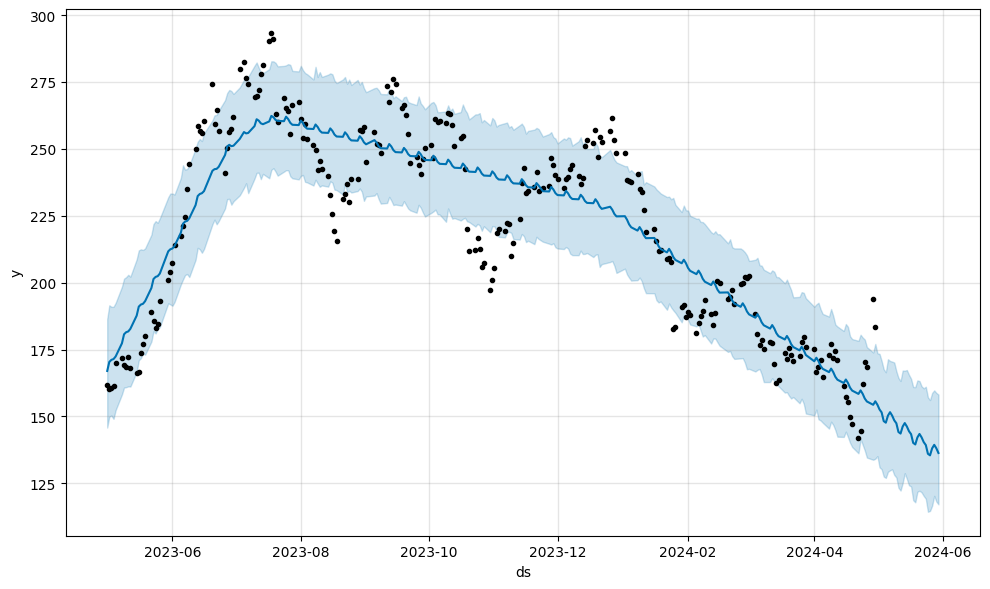

In [ ]:
# more visualization for better understanding
figure = m.plot(forecast, xlabel = 'ds', ylabel = 'y')

In [ ]:
# black dots are actual price, and curve is the forcast price
# shaded region is y_hatlower and y_hat upper

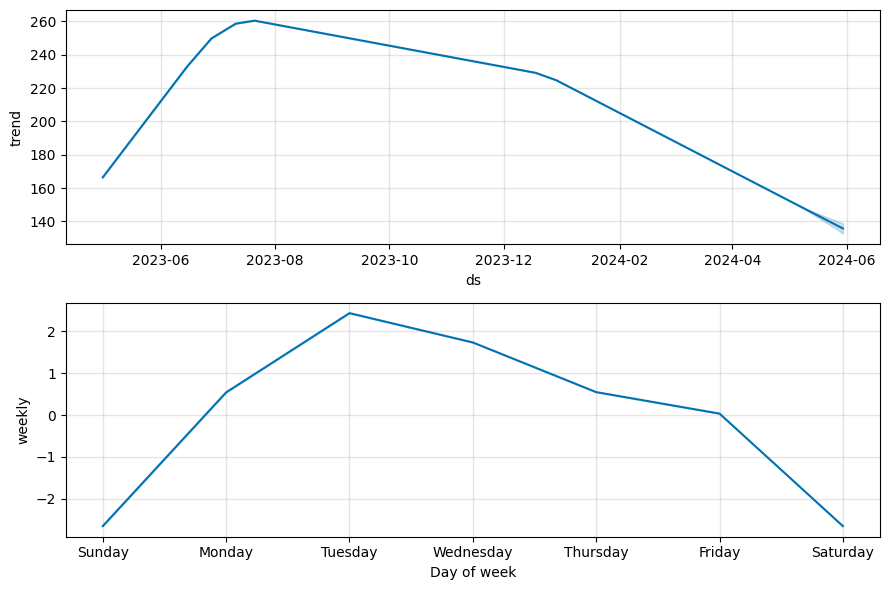

In [ ]:
# visualize the trend
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>